In [26]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np

In [27]:
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

--2020-12-03 18:59:31--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-03 18:59:31--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg.2’

Marquette.jpg.2     100%[===================>] 471.02K  --.-KB/s    in 0.03s   

2020-12-03 18:59:31 (18.2 MB/s) - ‘Marquette.jpg.2’ saved [482326/482326]



Otsus's Methos:

Maximize variance between background and foreground pixels

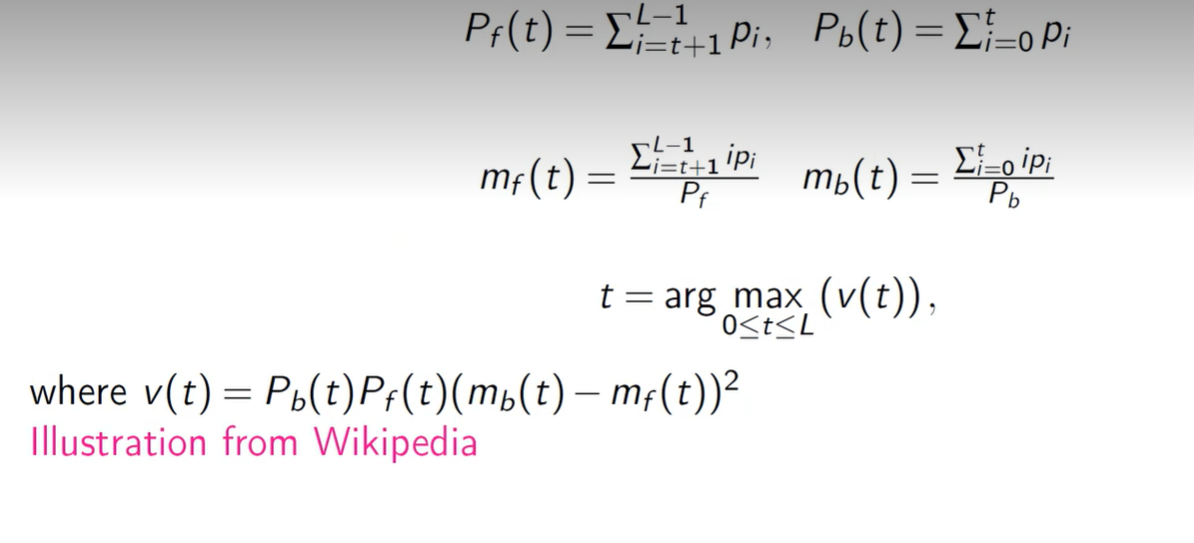

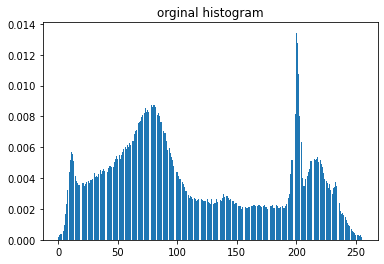

In [3]:
# find image histogram

import matplotlib.pyplot as plt
import numpy as np

L =256
t =0

orig_hist, org_bins = np.histogram(img.ravel(), L, [0,L], density=True)  
# density=True help to show the probility ( normalized histogram)
plt.bar(org_bins[:-1],orig_hist)
plt.title('orginal histogram')
plt.show()


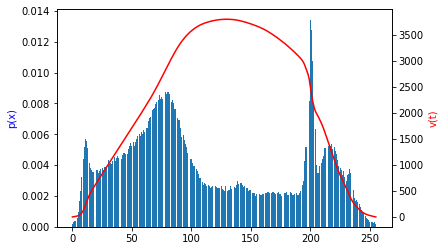

Otsu's threshold = 129


In [6]:
# find Otsu's threshold
v = np.zeros(L)
i = np.arange(L)

pi = orig_hist

for t in range(1, L-1):
  #foreground probility
  Pf = np.sum(pi[t+1:]) 
  mf = np.dot(i[t+1:],pi[t+1:])/Pf
  
  # background probility
  Pb = np.sum(pi[:t]) 
  mb = np.dot(i[:t],pi[:t])/Pb
  v[t]= Pb * Pf * ((mb - mf) ** 2.0)

# in 2 different images
# fig , ax1 = plt.subplots()
# ax1.set_ylabel('p(x)', color = 'blue')
# plt.bar(org_bins[:-1], orig_hist)
# plt.show()
# plt.plot(v)
# plt.show()

fig , ax1 = plt.subplots()
ax1.set_ylabel('p(x)', color = 'blue')
plt.bar(org_bins[:-1], orig_hist)

ax2 = ax1.twinx()
ax2.set_ylabel('v(t)', color= 'red')
plt.plot(v, color='red')
plt.show()

t = np.argmax(v) - 1
print("Otsu's threshold = {}".format(t))

In [11]:
from skimage.filters import threshold_otsu
from skimage.filters.thresholding import threshold_otsu

thresh = threshold_otsu(np.asarray(img))
print("Otsu's threshold = {}".format(thresh))

Otsu's threshold = 129


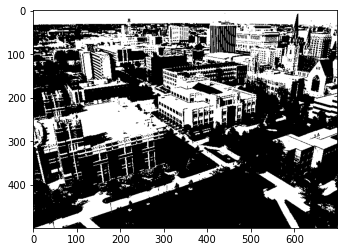

In [10]:
# Threshold Image (binirized)

img_otsu = 255 * (img > thresh)
plt.imshow(img_otsu, 'gray')
plt.show()



Looking at entrophy instead of variance



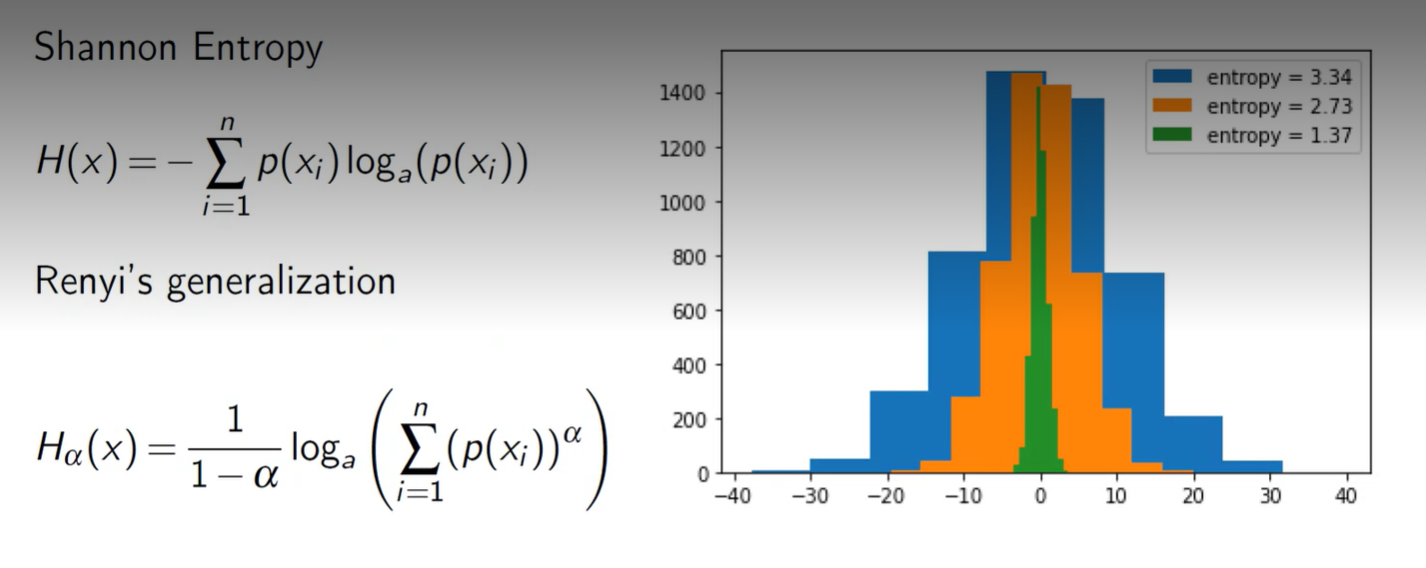

alpha in Renyi = 1 ==> becomes shannon



In [25]:
# Entropy
def entropy(pk):
  pk[ pk==0 ] += 1e-20  #because we do not want log0! 
  return -np.sum(pk * np.log2(pk))

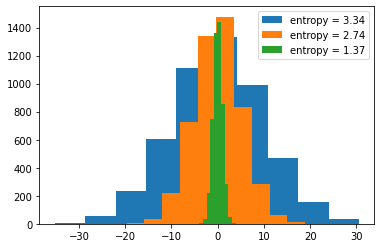

In [26]:
v2 = np.random.randn(5000)
v3 = 5 * np.random.randn(5000)
v4 = 10 * np.random.randn(5000)


p2, b2 = np.histogram(v2, 50, range=(-40,40), density= True)
p3, b3 = np.histogram(v3, 50, range=(-40,40), density= True)
p4, b4 = np.histogram(v4, 50, range=(-40,40), density= True)

plt.hist(v4)
plt.hist(v3)
plt.hist(v2)

plt.legend(('entropy = {:.2f}'.format(entropy(p4)),
            'entropy = {:.2f}'.format(entropy(p3)),
            'entropy = {:.2f}'.format(entropy(p2))
            ))

plt.show()

In [4]:
# Renyi's Entropy
def reni_entropy(pk, alpha=2.0):
  #return np.log(np.sum(np.power(pk, alpha)) + np.spacing(1))
  return (1.0/(1-alpha)) * np.log(np.sum(np.power(pk, alpha)) + 1e-20)

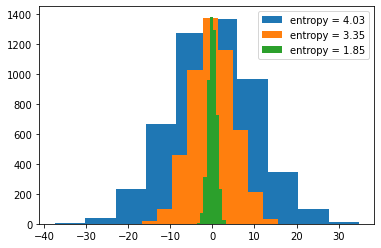

In [28]:
v2 = np.random.randn(5000)
v3 = 5 * np.random.randn(5000)
v4 = 10 * np.random.randn(5000)


p2, b2 = np.histogram(v2, 50, range=(-40,40), density= True)
p3, b3 = np.histogram(v3, 50, range=(-40,40), density= True)
p4, b4 = np.histogram(v4, 50, range=(-40,40), density= True)

plt.hist(v4)
plt.hist(v3)
plt.hist(v2)

plt.legend(('entropy = {:.2f}'.format(reni_entropy(p4)),
            'entropy = {:.2f}'.format(reni_entropy(p3)),
            'entropy = {:.2f}'.format(reni_entropy(p2))
            ))

plt.show()

Renyi's Threshold

Renyi's entropy threshold = 102


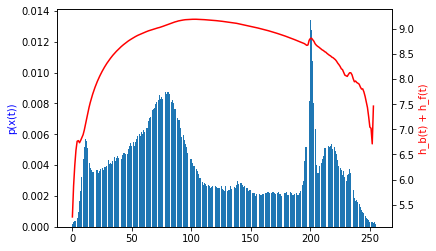

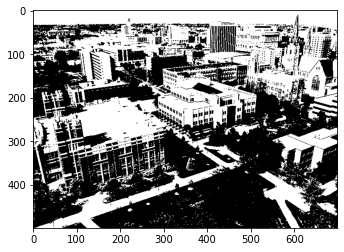

In [9]:
# find Renyi's threshold

import matplotlib.pyplot as plt
import numpy as np

L =256
t =0

orig_hist, org_bins = np.histogram(img.ravel(), L, [0,L], density=True)  

v = np.zeros((L,1), dtype=float)
i = np.arange(L)

pi = orig_hist

for t in range(1,L-1):
  hb = reni_entropy(pi[:t]/np.cumsum(pi[:t])[-1])  # background
  hf = reni_entropy(pi[t+1:]/(1.0 - np.cumsum(pi[:t])[-1])) # foreground
  v[t] = hb + hf

t = np.argmax(v) -1

print("Renyi's entropy threshold = {}".format(t))



# visualization

fig , ax1 = plt.subplots()
 
ax1.set_ylabel('p(x(t))', color =  'blue')
plt.bar(org_bins[:-1], orig_hist)

ax2 = ax1.twinx()
ax2.set_ylabel('h_b(t) + h_f(t)', color = 'red')
plt.plot(v[1:-1], color = 'red')
plt.show()



#threshold image
img_renyi = 255 * ( img> t)
plt.imshow(img_renyi, 'gray')
plt.show()

Adaptive Threshold

split image into blocks and threshold each block separately

In [10]:
from skimage.filters.thresholding import threshold_otsu
thresh = threshold_otsu(np.asarray(img))
print("Otsu's threshold = {}".format(thresh))

Otsu's threshold = 129


[[127. 133.]
 [129. 135.]]


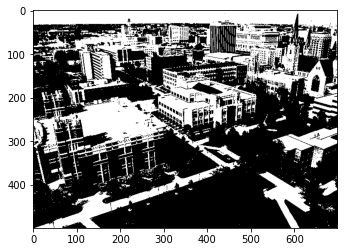

In [17]:
M, N = img.shape

# split images into Nx x Ny blocks
Nx =  2
Ny = 2

I = M//Nx
J = N//Ny

thr = np.zeros((Nx, Ny))

img_thr = np.zeros((M,N), dtype=np.uint8)

for i in range(Nx):
  for j in range (Ny):
    # thr[i,j] = threshold_otsu(np.asarray(img[i*I:(i+1)*I, j*J:(j+1)*J] ))
    # img_thr[i*I:(i+1)*I, j*J:(j+1)*J] = 255 * (img[i*I:(i+1)*I, j*J:(j+1)*J] > thr[i,j])
    # or
    sub_img = img[i*I:(i+1)*I, j*J:(j+1)*J]
    thr[i,j] = threshold_otsu(np.asarray(sub_img))
    img_thr[i*I:(i+1)*I, j*J:(j+1)*J] = 255 * (sub_img > thr[i,j])

print(thr)

plt.imshow(img_thr, 'gray')



Region based Segmentation

Watershed Segmentation

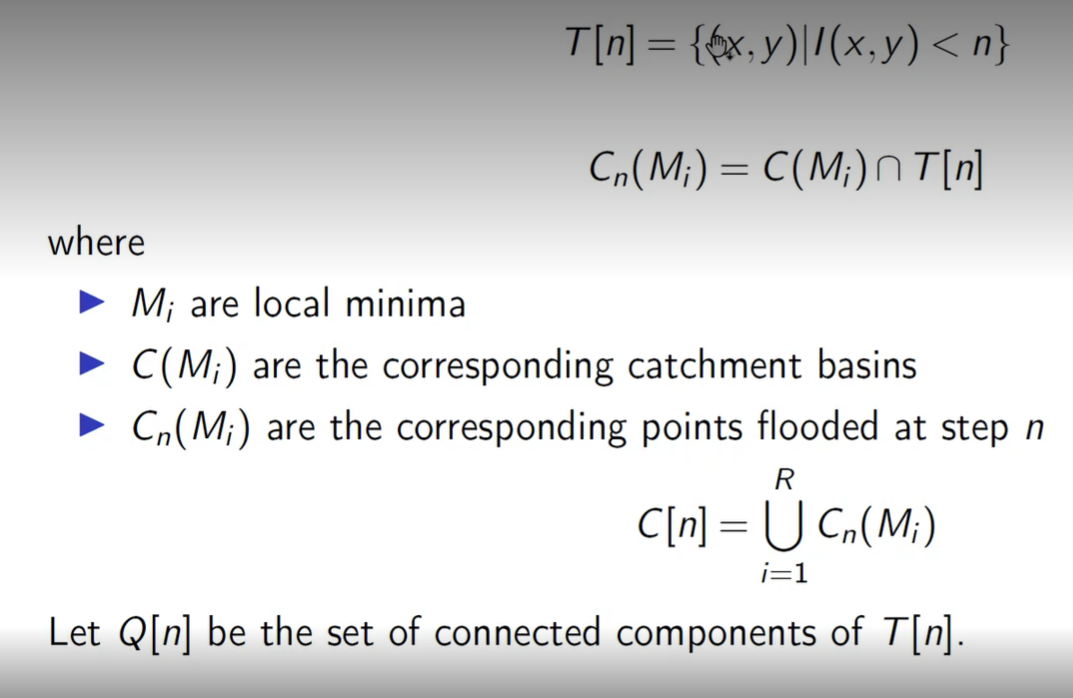

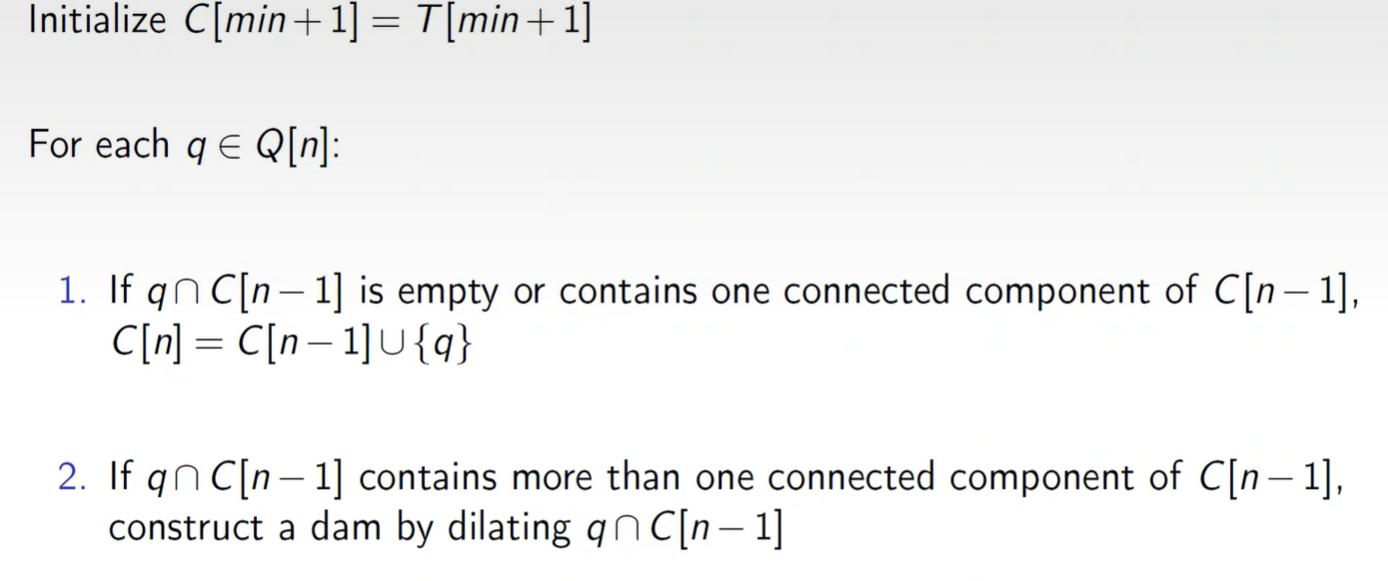

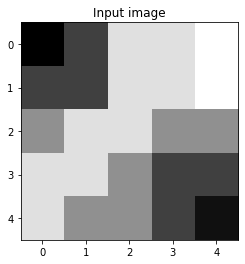

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


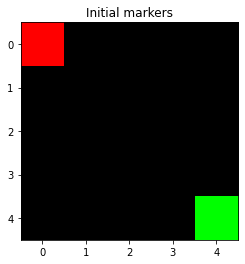

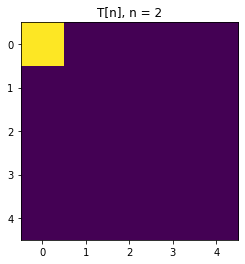

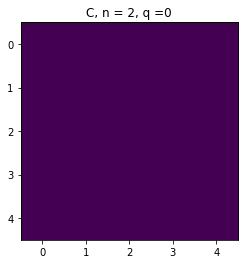

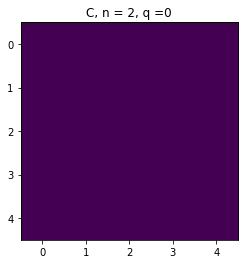

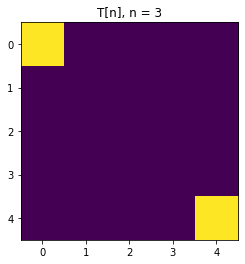

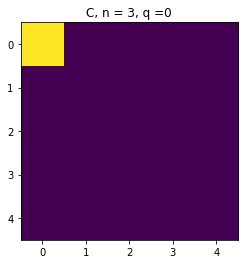

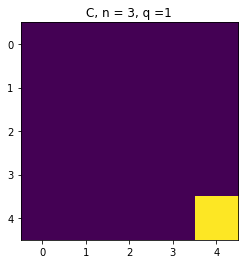

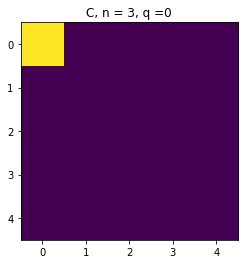

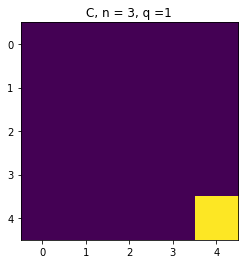

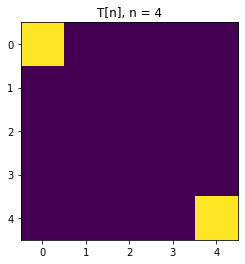

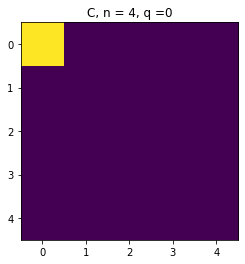

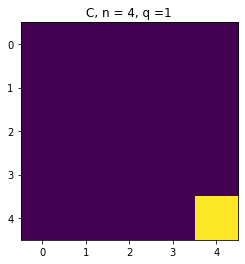

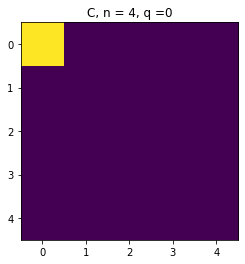

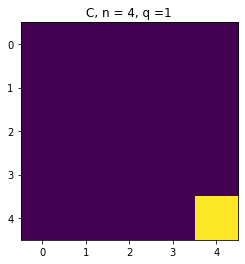

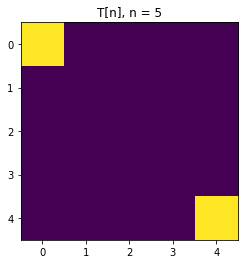

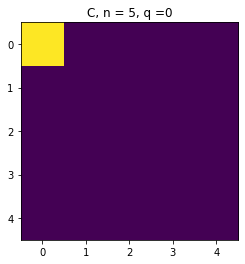

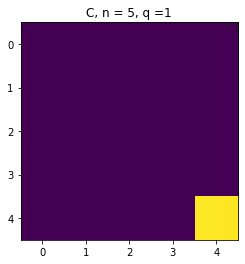

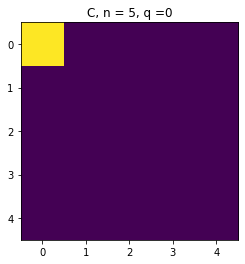

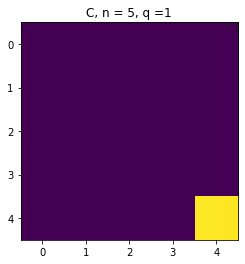

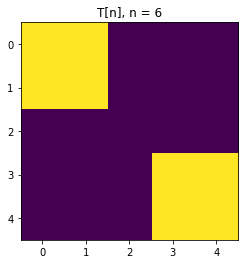

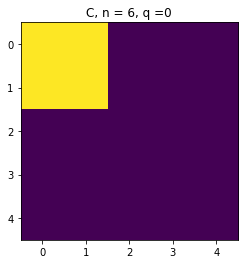

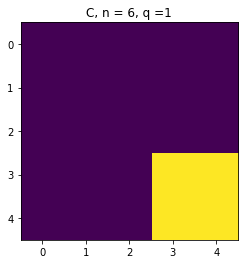

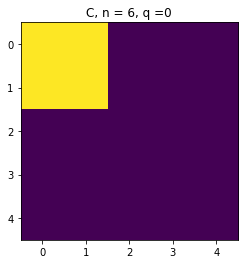

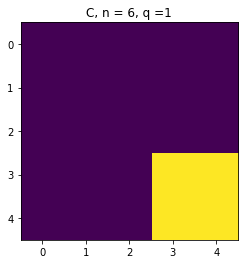

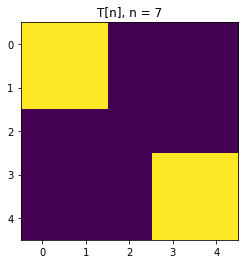

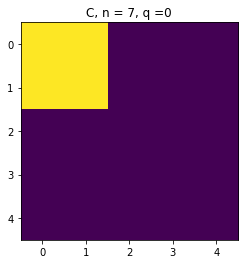

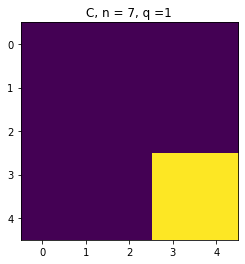

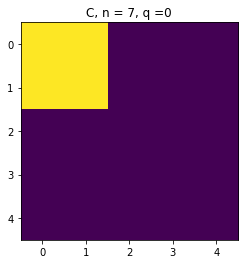

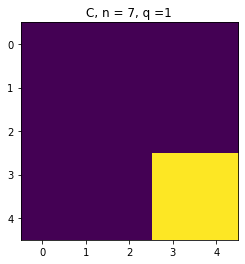

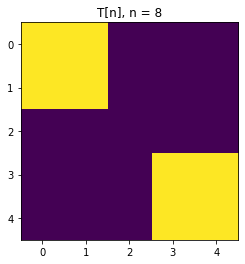

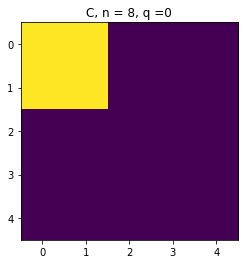

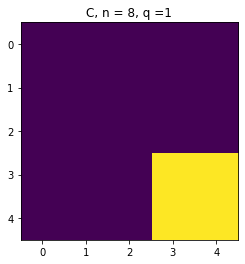

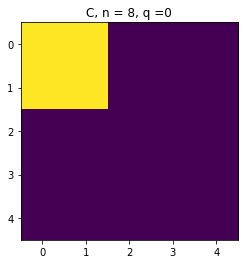

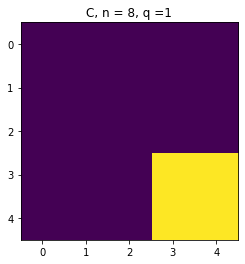

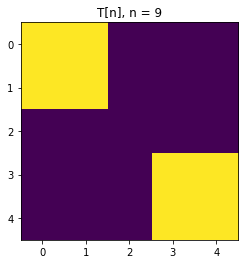

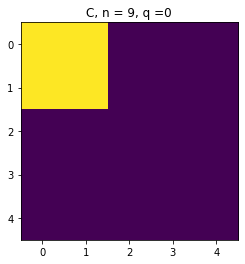

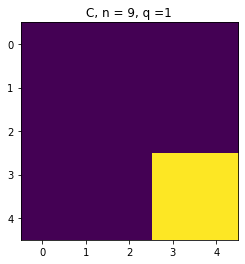

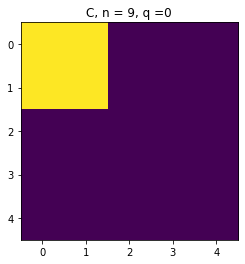

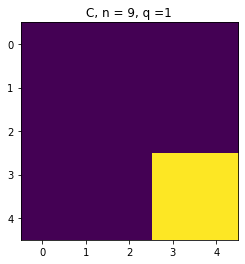

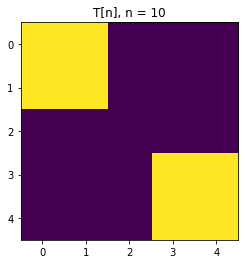

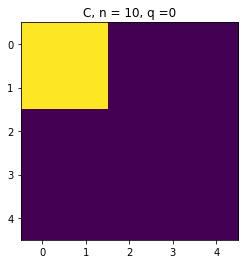

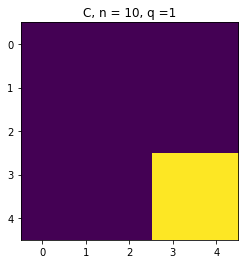

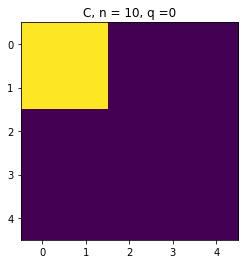

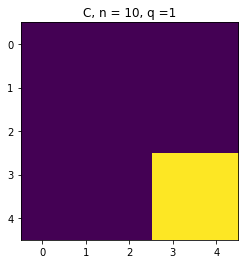

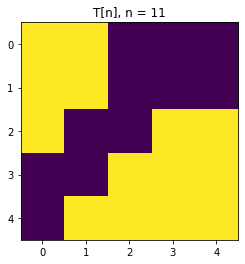

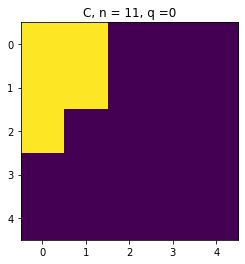

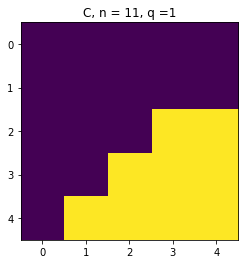

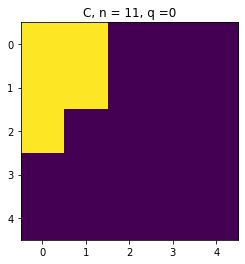

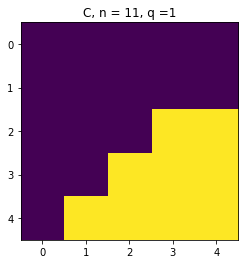

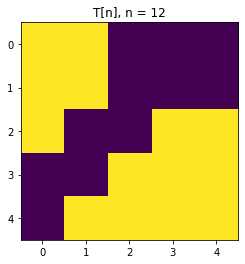

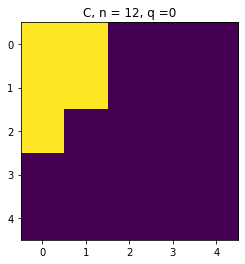

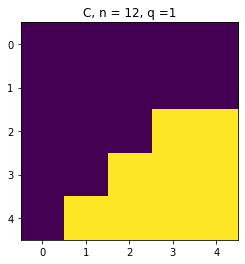

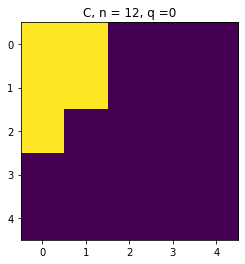

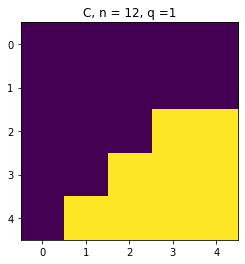

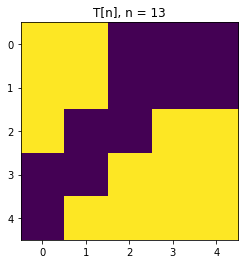

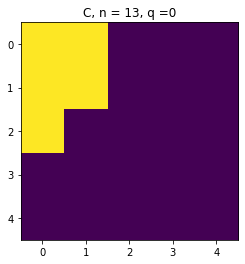

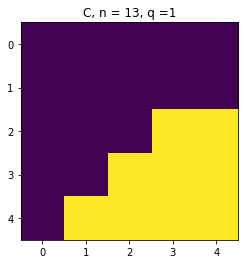

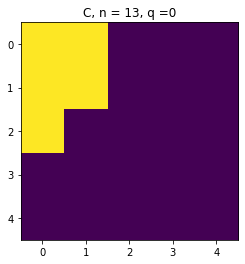

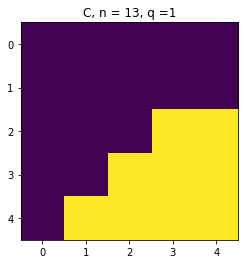

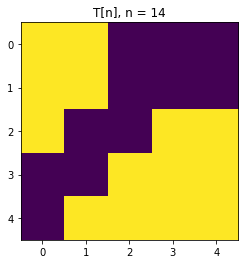

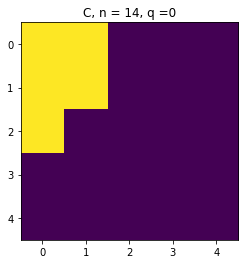

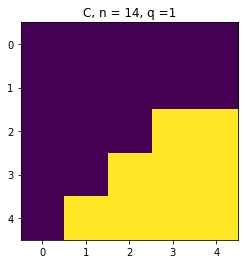

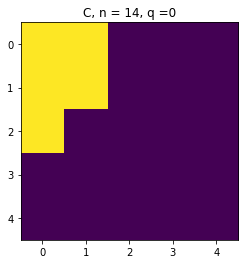

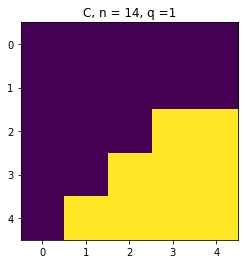

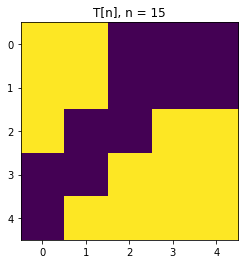

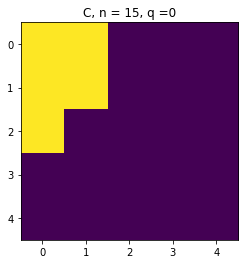

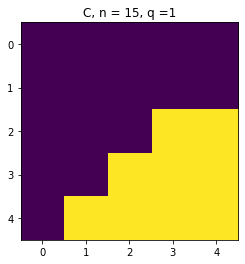

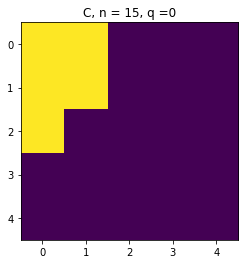

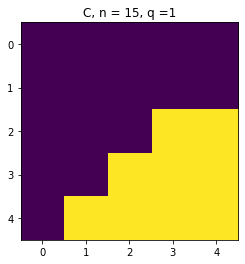

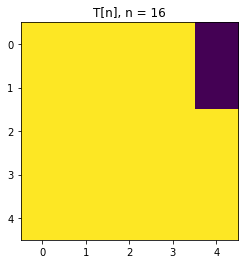

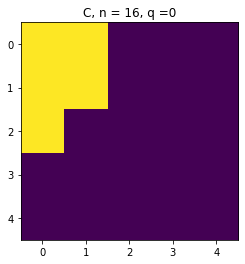

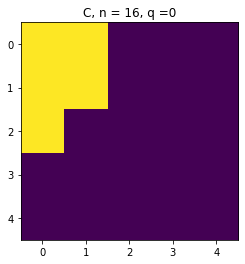

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


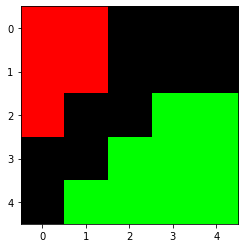

[[[1. 0. 0.]
  [1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]]


In [24]:
#watershed Algorithm

import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label

I = np.array([[1,5,15,15,17],
              [5,5,15,15,17],
              [10,15,15,10,10],
              [15,15,10,5,5],
              [15,10,10,5,2]
              ])

# initialial makrkers
mark = np.array([[0,0],[4,4]]) # local minimum location

# visualize
plt.title('Input image')
plt.imshow(I, 'gray')
plt.show()

# assume no more than 2 markers

Cn = np.zeros(np.dstack((I,I,I)).shape) # C at itration n
C  = np.zeros(np.dstack((I,I,I)).shape)  # final result

for idx , markers in enumerate(mark):
  Cn[markers[0],markers[1], idx] = 1

# visualize
plt.title('Initial markers')
plt.imshow(255 * Cn)
plt.show()


n_min = np.min(I)
n_max = np.max(I)

for n in range(n_min+1, n_max):
  T = I < n
  # visualize
  plt.title('T[n], n = {}'.format(n))
  plt.imshow(255 * T)
  plt.show()

  for idx in range(len(mark)):
    Cn[:,:,idx] = np.logical_and(C[:,:,idx],T) # intersection

    #catchment basins
    q = label(T) # connected component 
    # print(q) # show connected components
    num = np.max(q) # get number of connected components 
    for idx1 in range(num):
      for idx2 in range(num):
        if idx1 != idx2:
          #update catchment basin
          Cn[:,:,idx1] = np.logical_and(idx1+1 ==q , idx2+1 !=q)
          #dams
          Cn[:,:,2] = np.logical_and(Cn[:,:,idx1], Cn[:,:,idx2])
      C[:,:,idx1] = np.logical_or(Cn[:,:,idx1], C[:,:,idx1]) # Union
      # visualize
      plt.title('C, n = {}, q ={}'.format(n, idx1))
      plt.imshow(255 * C[:,:,idx1])
      plt.show()

plt.imshow(255 * C)
plt.show()
print(C)


[]

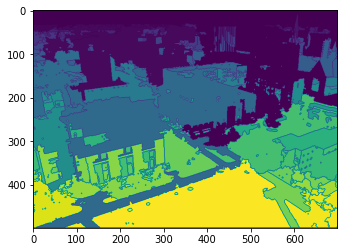

In [29]:
#watershed Segmentation
import cv2

ret, markers = cv2.connectedComponents(img_thr)

# cv2.watershed requires a 3-channel image

img_conv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_ws = cv2.watershed(img_conv, markers)

plt.imshow(img_ws)
plt.plot()

